In [140]:
from plio.io.io_moon_minerology_mapper import M3
from libpyhat.derived.m3 import pipe
from libpyhat.derived.m3 import new
import libpyhat as phat
import gdal
from libpyhat.examples import get_path

%pylab inline

# Further documentation on LibPyHat can be found at: 
# https://usgs-astrogeology.github.io/PyHAT/

Populating the interactive namespace from numpy and matplotlib


In [141]:
file = './libpyhat/examples/M3/M3G20090209T054031_V01_SUP.IMG'

data = gdal.Open(file)

# How to open an Image

In [142]:
# First, get the path of the file that contains the image you want to view.
# In this example, the program will search for and use the file "M3_4030seg_L2_aristcrater.tif"
# using the "get_path" function.
filepath = 'libpyhat/examples/M3/M3G20090209T072710_V01_SUP.IMG'

# Next, use the M3 constructor found in the plio module to open the image
# by feeding it the filepath.
image = M3(filepath)

# In this case, the variable "image" can now be used as a reference to the given M3 image.

# How to Display a Single Band (By Index)

In [143]:
# First,open the desired .IMG file and store it in a variable, as shown in the previous cell.

# The "get_path" function can be used inside of the M3 object constructor to achieve the same effect.
m3_image = M3('libpyhat/examples/M3/M3G20090209T054031_V01_RFL.IMG')

# Output the dimensions of the image to confirm that it was imported properly.
print(m3_image[0].shape)

(23299, 304)


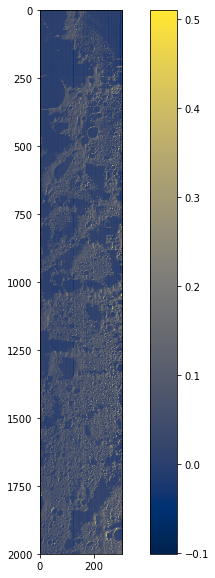

In [144]:
# Next, run the function to display the band.
# The image[n] parameter is used to select the index (n) 
# The cmap parameter is used to select the color mapping.

# Color mapping options can be found at:
# https://matplotlib.org/tutorials/colors/colormaps.html

# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Next, run the function to display the band.

# The m3_image[n][y, x] parameter indicates the band index (n),
# the range (y) in the form of [min_y_val:max_y_val],
# and the domain (x) is the form of [min_x_val:max_x_val]

# The 'cmap' parameter is used to select the color mapping.
# Color mapping options can be found at:
# https://matplotlib.org/tutorials/colors/colormaps.html

# The 'alpha' parameter sets the opacity percentage.

band_index = 3

min_x_val = None
max_x_val = None

min_y_val = 0
max_y_val = 2000

color_mapping = 'cividis'

opacity = 1

imshow(m3_image[3][min_y_val:max_y_val, min_x_val:max_x_val], cmap=color_mapping, alpha = opacity)

# Finally, apply a colorbar to provide a "key" that describes the relative value of each color.
colorbar()

# How to Display a Single Band (By Label)

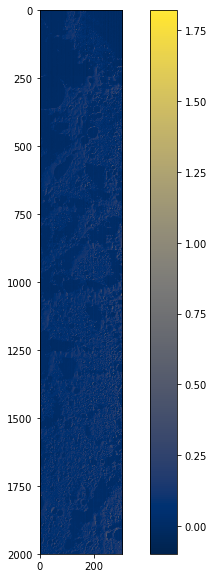

In [145]:
# Run the function to display the band.
# The image[n] parameter is used to select the index (n) 
# The cmap parameter is used to select the color mapping.

# Color mapping options can be found at:
# https://matplotlib.org/tutorials/colors/colormaps.html

# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Next, run the function to display the band.

# The m3_image.loc[n][y, x] parameter indicates the band label (n),
# the range (y) in the form of [min_y_val:max_y_val],
# and the domain (x) is the form of [min_x_val:max_x_val]

# The 'cmap' parameter is used to select the color mapping.
# Color mapping options can be found at:
# https://matplotlib.org/tutorials/colors/colormaps.html

# The 'alpha' parameter sets the opacity percentage.

band_label = 770

min_x_val = None
max_x_val = None

min_y_val = 0
max_y_val = 2000

color_mapping = 'cividis'

opacity = 1

imshow(m3_image.loc[band_label][min_y_val:max_y_val, min_x_val:max_x_val], cmap=color_mapping, alpha = opacity)

# Finally, apply a colorbar to provide a "key" that describes the relative value of each color.
colorbar()

# How to Generate an Olivine Derived Image (WIP)

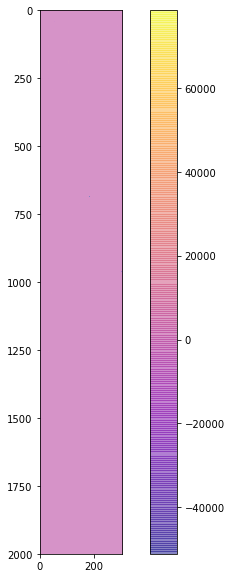

In [153]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Run the olivine index method and store the result in a variable.
olivine_index_result = pipe.olindex(m3_image)

# Next, run the function to display the band.
# Note: using a lower alpha percentage allows the
# output to be used as an overlay.
imshow(olivine_index_result[0:2000, :], cmap='plasma', alpha = .5)
# Finally, display the associated color key (colorbar) alongside the band.
colorbar()

# How to Display a Multi-Band Derived Image (WIP)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


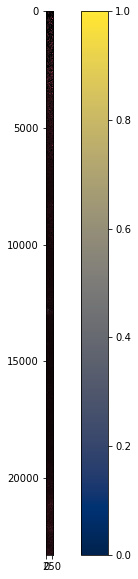

In [157]:
# Set the dimensions of the output picture. (figure)
figure(1, figsize=(10, 10))

# Here you can specify which bands you would like to use.
bands = [1978, 540, 770]

min_x_val = None
max_x_val = None

min_y_val = 0
max_y_val = 2000

color_mapping = 'cividis'

opacity = 1

multiband = m3_image.loc[bands][min_y_val:max_y_val, min_x_val:max_x_val]
multiband = np.moveaxis(multiband, 0, -1)  # The axis movement is required for a 3-band plot.

imshow(multiband, cmap=color_mapping, alpha = opacity)

# Finally, apply a colorbar to provide a "key" that describes the relative value of each color.
colorbar()
# You can also specify a range and domain to acquire a subset of the image. 
# The syntax to do this would be: [bands, ystart:ystop, xstart:xstop].

# How to Generate a 'mustard' Derived Image

/home/egault/Desktop/pyhat_work/PyHAT-dev/PyHAT-dev/notebooks/libpyhat/derived/utils.py:192: UserWarning: Parameters involving some of the visible wavelengths ( < 600 nm) are not recommended for use. Parameters modeled after Clementine data are also not recommended. Original parameter estimates for OH and H2O should NOT be included.
  warnings.warn('Parameters involving some of the visible wavelengths ( < 600 nm) are not recommended for use. Parameters modeled after Clementine data are also not recommended. Original parameter estimates for OH and H2O should NOT be included.')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


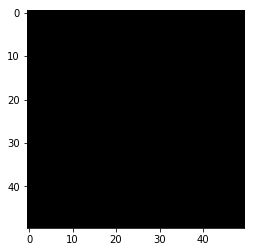

In [148]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Getting warnings for passing in the M3 object directly.
mustard_result = new.mustard(tif_image)

# Produces black square when result is fed into imshow.
imshow(mustard_result)

# How to Extract Spectra at an Individual Pixel

In [149]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))




# How to Extract Spectra in a ROI

# How to Extract Spectra with a Function Applied

# How to Perform Continuum Removal

# How to Apply the Horgan Algorithms

# Bonus: How to Display Two or More Single-Band Images at Once

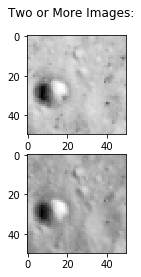

In [150]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Initialize the array to hold all of the band images.
images = []

# Specify how many bands you want to display.
number_of_images = 2

# Create the figure object that will hold the band images within subplots.
figure1, axes1 = subplots(number_of_images)

# Choose a title, if you want.
figure1.suptitle('Two or More Images:')

# Add the band images to the image array:

# axes[n] selects the row in which the image will be displayed (n).

# tif_image[i] selects band via index (i) from the tif image. 
# Note: 'tif_image.loc[label]' can also be used in order to select the band by label.

# The cmap parameter is used to select the color mapping.
# Color mapping options include:'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                               'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                               'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

images.append(axes1[0].imshow(tif_image[0], cmap='Greys'))


images.append(axes1[1].imshow(tif_image[50], cmap='Greys'))

# By default, subplots have x and y tick labels, so this loop will remove them, if needed.

# for axi in axes1:
#     axi.set_xticks([])
#     axi.set_yticks([])


# This could be useful for future applications, where someone may want to compare two or more specific bands.
# Running two imshows in a row would normally overwrite the previous imshow, so a matplotlib figure object
# can be used to remedy this.
# However, refactoring to make the code easier to manipulate and read would be ideal.
# At the moment, I'm not sure how to resize the image, or add a colorbar to each of them.